In [1]:
include("fld.jl")
using PyPlot
using CSV

┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1273
┌ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1273
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1273


In [2]:
tfinal = 5.0
if abs(tfinal - 1) < 1e-3
    sol = convert(Array,CSV.read("marshak_1sh.csv", header=0));
elseif abs(tfinal - 5) < 1e-3
    sol = convert(Array,CSV.read("marshak_5sh.csv", header=0));
elseif abs(tfinal - 10) < 1e-3
    sol = convert(Array,CSV.read("marshak_10sh.csv", header=0));
    
end

100×2 Array{Float64,2}:
 0.0025  0.998824
 0.0075  0.996449
 0.0125  0.99404 
 0.0175  0.991595
 0.0225  0.989113
 0.0275  0.986595
 0.0325  0.984039
 0.0375  0.981441
 0.0425  0.978803
 0.0475  0.976124
 0.0525  0.973401
 0.0575  0.970631
 0.0625  0.967816
 ⋮               
 0.4425  0.0     
 0.4475  0.0     
 0.4525  0.0     
 0.4575  0.0     
 0.4625  0.0     
 0.4675  0.0     
 0.4725  0.0     
 0.4775  0.0     
 0.4825  0.0     
 0.4875  0.0     
 0.4925  0.0     
 0.4975  0.0     

In [6]:

println("Running until time $(tfinal)")
#set up Marshak wave problem with large R
Nr = 5
Nz = 100
Lz = 0.5
println("Size of domain in Z is $(Lz)")
Lr = 1000

T = zeros(Nr*Nz) .+ 1.0e-8

sigma_func(t,T,Nr,Nz,Lr,Lz) = 300.0*abs.(reshape(T,Nr,Nz)).^-3
D_func(t,T,Nr,Nz,Lr,Lz,Er,sigma) = 1.0./(3.0*sigma)
Cv_func(t,T,Nr,Nz,Lr,Lz) = reshape(0.3.+T*0, Nr,Nz)
EOS(t,T,Nr,Nz,Lr,Lz) = 0.3*T
invEOS(t,E,Nr,Nz,Lr,Lz) = (E/0.3)

function Q_func(t,T,Nr,Nz,Lr,Lz)
    Q = zeros(Nr,Nz)
end
    

Running until time 5.0
Size of domain in Z is 0.5


Q_func (generic function with 1 method)

In [7]:
times, Er_t,T_t = time_dep_RT(tfinal,0.001,T,zeros(Nr*Nz),D_func, sigma_func, Q_func,Cv_func,EOS,invEOS,
                      Nr, Nz, Lr, Lz, lower_z=a, upper_z="vacuum", upper_r="refl",LOUD=-1);

5001
Step 5000, t = 5.0


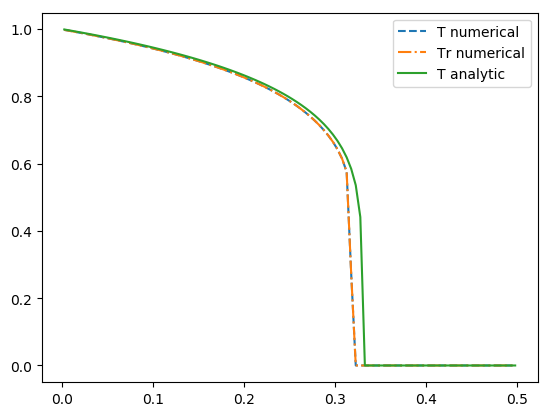

PyObject <matplotlib.legend.Legend object at 0x7fd6d9006860>

In [9]:
hr = Lr/Nr
hz = Lz/Nz
zmid = range(hz*0.5, stop=Lz-hz*0.5,length=Nz)
T_plot = reshape(T_t[:,size(times)[1]],Nr,Nz)
plot(zmid,T_plot[3,:,1],"--", label="T numerical")
Tr_plot = reshape((Er_t[:,size(times)[1]]/a).^.25,Nr,Nz)
plot(zmid,Tr_plot[3,:,1],"-.", label="Tr numerical")
plot(sol[:,1], sol[:,2],label="T analytic")
legend(loc="best")

In [197]:
#now do it from other side

In [198]:
times, Er_t,T_t = time_dep_RT(tfinal,0.001,T,zeros(Nr*Nz),D_func, sigma_func, Q_func,Cv_func,EOS,invEOS,
                      Nr, Nz, Lr, Lz, lower_z="vacuum", upper_z=a, upper_r="refl",LOUD=-1);

5001
Step 5000, t = 5.0


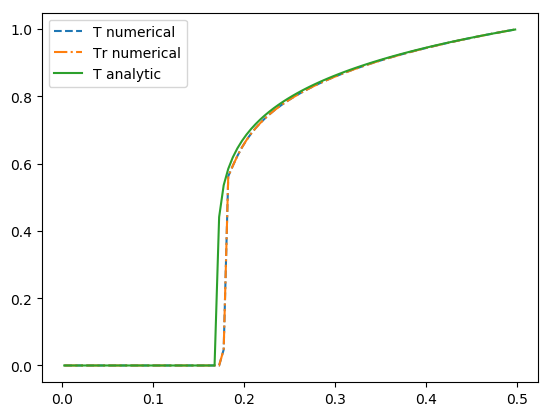

PyObject <matplotlib.legend.Legend object at 0x1392862d0>

In [199]:
hr = Lr/Nr
hz = Lz/Nz
zmid = linspace(hz*0.5, Lz-hz*0.5,Nz)
T_plot = reshape(T_t[:,size(times)[1]],Nr,Nz)
plot(zmid,T_plot[3,:,1],"--", label="T numerical")
Tr_plot = reshape((Er_t[:,size(times)[1]]/a).^.25,Nr,Nz)
plot(zmid,Tr_plot[3,:,1],"-.", label="Tr numerical")
plot(0.5-sol[:,1], sol[:,2],label="T analytic")
legend(loc="best")